<a href="https://colab.research.google.com/github/lisa-holland/HPC_Course/blob/main/Copy_of_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Student Name: Lisa Holland

---
# PHYS4003: Statistics Module Assignment

**Due on Augst 22, 2024**

**Total points: 50 (15% of the total mark for the unit)**

---

**Academic Integrity**

This is an individual assessment, and you should produce your own work. You may discuss the assignment with your colleagues in the early stages of problem solving, but you should write your own solutions, and should not share solutions with your fellow students. References are required for any external content that you draw on. Asking others (e.g. friends,family, websites, tutors) for answers to questions is contract cheating, and is not permitted

---

**Instructions for the assignment:**
- The assignment is a single Jupyter notebook, containing 2 questions (each with multiple parts).
- You are free to use code snippets from the tutorial notebooks.
- The assignment also has four associated text files, which contain the input data for analysis in the assignment. These files are automatically read in within the notebook. They simply need to be in the same folder as the Jupyter notebook file. If you are running the notebook on your own local setup, you need to download and put them in the same folder as the notebook.
- You should submit your completed notebook as a Jupyter notebook through Blackboard.
- Some questions may require you to define new python variables/functions and test your work by running cells over and over or add new cells for yourself to check/test. This is fine. Just make sure that after you have tested what you return is a clean notebook that runs smoothly and only has the output that is requested in each question.

- Before submission, make sure that your notebook can be executed in a single run from beginning to end. E.g., by clicking the <kbd>Restart & Run All</kbd> under the <kbd>Kernel</kbd> menu. If there are questions/parts that you have left blank or incomplete, which do not allow a complete computational run to be executed, comment them out and add an explanation about your partial work in the same cell (as a python comment block).

**IF YOU ARE RUNNING THIS ON GOOGLE COLAB, YOU NEED TO RUN THE FOLLOWING CELL FIRST.**

In [2]:
# If you are running this on Google colab, you need to run the following:
!pip install emcee
!pip install astropy
!pip install corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import scipy.stats as st
from scipy.optimize import fsolve, minimize
from scipy.integrate import quad
from scipy.misc import derivative
import emcee
from astropy.io import ascii
import matplotlib.pylab as plt
import matplotlib.colors as colors
import corner

# Setting plot fonts
plt.rc('font', family='serif')

# Below is a set of colors for matplotlib that is colorblind-friendly.
# To use them in plotting commands, you can simply set "color=colorset[N]",
# where N is an integer in [0,16), reflecting the index of the colors below.
colorset = ['#000000','#00270C','#00443C','#005083',
            '#034BCA','#483CFC','#9C2BFF','#EB24F4',
            '#FF2DC2','#FF4986','#FF7356','#FFA443',
            '#EBD155','#D3F187','#D7FFC8','#FFFFFF']

def cornerplot(a,b,c,d):
    """
    A function to plot joint and marginal samples from MCMC
    No need to do anything, it will do its thing.
    """
    fig = plt.figure(figsize=(8,8))
    plot = corner.corner(np.array(list(zip(*[a,b]))),labels=['m','d'], show_titles=True, fig=fig, truths=[c, d],
                  title_kwargs={"fontsize": 20},label_kwargs={"fontsize": 20})
    return fig

def mcmc_runner(logpf, x, y, dy):
    """
    A function to run MCMC sampling
    No need to do anything, it will do its thing.
    """
    ndim = 2
    nwalkers = 50
    nburn = 1000
    nsteps = 4000
    starting_guesses = 2 * np.random.rand(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, logpf, args=[x, y, dy])
    sampler.run_mcmc(starting_guesses, nsteps)
    posterior_sample_m = sampler.chain[:, nburn:, 0].ravel()
    posterior_sample_d = sampler.chain[:, nburn:, 1].ravel()
    return sampler.chain, posterior_sample_m, posterior_sample_d

## Q 1: Descriptive statistics for samples and populations (10 points)

As we discussed in the lecture, estimating the same descriptive statistics for a sample is different from calculating them for a function. Here, we have three samples and a distribution we want to examine:

In [4]:
sample1 = np.loadtxt('https://raw.githubusercontent.com/bersavosh/P4003/main/Assignment/Data_Assignment_part1_sample1.txt')
sample2 = np.loadtxt('https://raw.githubusercontent.com/bersavosh/P4003/main/Assignment/Data_Assignment_part1_sample2.txt')
sample3 = np.loadtxt('https://raw.githubusercontent.com/bersavosh/P4003/main/Assignment/Data_Assignment_part1_sample3.txt')

def a_new_pdf(x):
    mu=0.4
    beta=0.15
    z = (x-mu)/beta
    return np.exp(-(z+np.exp(-z)))/beta


def a_new_cdf(x):
    """
    This is just the CDF to the PDF defined above.
    """
    mu=0.4
    beta=0.15
    return np.exp(-np.exp(-(x-mu)/beta))

### a. Plot the PDF as a line and the samples as histograms (2 points)

The goal is compare samples to the PDF. So, you can either plot all on the same plot or make a separate plot for each sample and plot the PDF in each one (which might make it visually easier). For binning, Review our discussion on histograms in lecture 3.

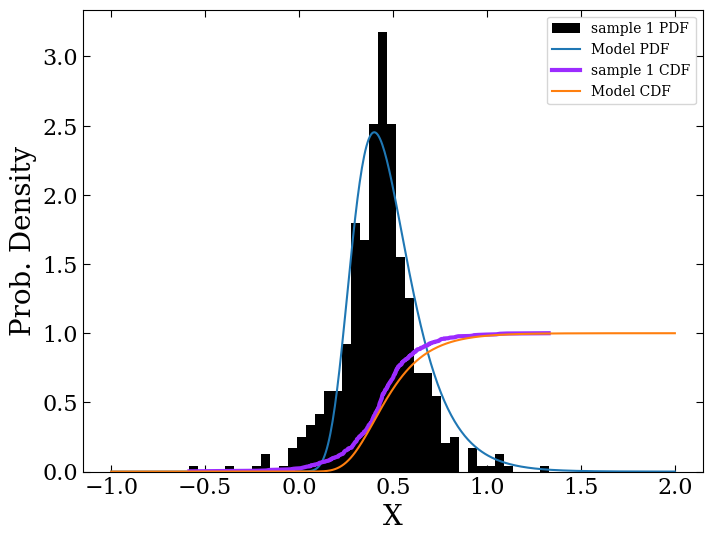

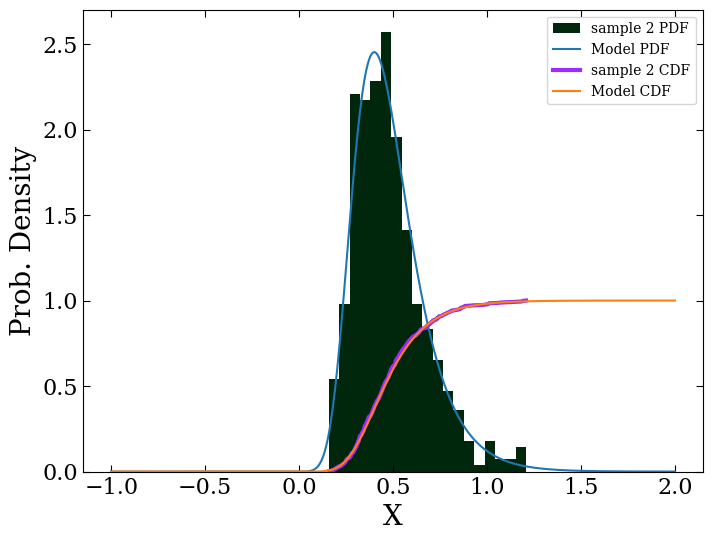

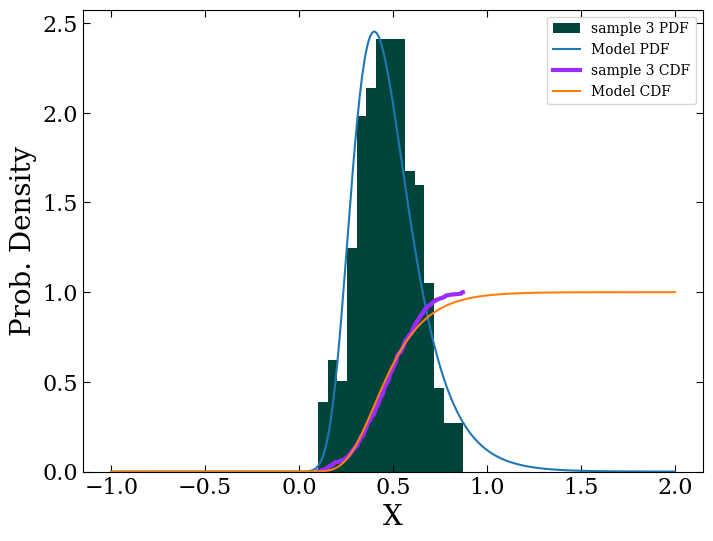

In [5]:
# <your turn>: output of this cell should be a plot
# or 3 plots if you decide to plot each sample separately

def emperical_cdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return x, y

sample1_edfx, sample1_edfy = emperical_cdf(sample1)
sample2_edfx, sample2_edfy = emperical_cdf(sample2)
sample3_edfx, sample3_edfy = emperical_cdf(sample3)

from astropy.visualization import hist
x = np.linspace(-1,2,500)
y = a_new_pdf(x)
cdf = a_new_cdf(x)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Prob. Density',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)
hist(sample1,bins="knuth",color=colorset[0], label="sample 1 PDF", density=True)
plt.plot(x, y, label="Model PDF")
plt.plot(sample1_edfx, sample1_edfy, color=colorset[6], label="sample 1 CDF", lw=3)
plt.plot(x, cdf, label="Model CDF")
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Prob. Density',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)
hist(sample2,bins="knuth",color=colorset[1], label="sample 2 PDF", density=True)
plt.plot(x, y, label="Model PDF")
plt.plot(sample2_edfx, sample2_edfy, color=colorset[6], label="sample 2 CDF", lw=3)
plt.plot(x, cdf, label="Model CDF")
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Prob. Density',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)
hist(sample3,bins="knuth",color=colorset[2], label="sample 3 PDF", density=True)
plt.plot(x, y, label="Model PDF")
plt.plot(sample3_edfx, sample3_edfy, color=colorset[6], label="sample 3 CDF", lw=3)
plt.plot(x, cdf, label="Model CDF")
plt.legend()
plt.show()

### b. Estimate the mean, standard deviation, kurtosis, skewness and median for the samples and the PDF function. (5 points)

Most of these are defined already in many packages available (including `numpy` and `scipy`). You can find and use the appropriate implementation, or define your own based on the definitions/estimations provided in lecture slides.

In [6]:
# <your turn> The output of this cell is generated automatically
# when you assign appropriate definitions for the variables below.
# You can add your own functions and variables here
def expectation_value():
  integrand = lambda x: x * a_new_pdf(x)
  return quad(integrand,-100,100)[0]

def std_dev():
  mean = expectation_value()
  integrand = lambda x: (x-mean)**2 * a_new_pdf(x)
  return np.sqrt(quad(integrand, -100, 100)[0])

def skew():
  mean = expectation_value()
  sigma = std_dev()
  integrand = lambda x: ((x - mean)/sigma)**3 * a_new_pdf(x)
  return quad(integrand, -100, 100)[0]

def kurtosis():
  mean = expectation_value()
  sigma = std_dev()
  integrand = lambda x: ((x - mean)/sigma)**4 * a_new_pdf(x)
  return quad(integrand, -100, 100)[0] - 3

def quantile(q):
    int_pdf = lambda x_uplim: quad(a_new_pdf, -100, x_uplim)[0] - q
    mean = expectation_value()
    return fsolve(int_pdf, x0=mean)[0]

pdf_mean = expectation_value()
pdf_sigma = std_dev()
pdf_skewness = skew()
pdf_kurtosis = kurtosis()
pdf_median = quantile(0.5)

def sample_expectation_value(sample):
  return sum(sample)/sample.size

samp1_mean = sample_expectation_value(sample1)
samp2_mean = sample_expectation_value(sample2)
samp3_mean = sample_expectation_value(sample3)

def sample_std_dev(sample):
  mean = sample_expectation_value(sample)
  var = 1/(sample.size-1) * sum((sample-mean)**2)
  return np.sqrt(var)

samp1_sigma = sample_std_dev(sample1)
samp2_sigma = sample_std_dev(sample2)
samp3_sigma = sample_std_dev(sample3)

def sample_skewness(sample):
  mean = sample_expectation_value(sample)
  numerator = 1/(sample.size-1) * sum((sample-mean)**3)
  denominator = (1/(sample.size-1) * sum((sample-mean)**2))**(3/2)
  return numerator/denominator

samp1_skewness = sample_skewness(sample1)
samp2_skewness = sample_skewness(sample2)
samp3_skewness = sample_skewness(sample3)

def sample_kurtosis(sample):
  mean = sample_expectation_value(sample)
  numerator = 1/(sample.size-1) * sum((sample-mean)**4)
  denominator = (1/(sample.size-1) * sum((sample-mean)**2))**2
  return (numerator/denominator) - 3

samp1_kurtosis = sample_kurtosis(sample1)
samp2_kurtosis = sample_kurtosis(sample2)
samp3_kurtosis = sample_kurtosis(sample3)

def sample_median(sample):
  temp = np.sort(sample)
  middle = temp.size/2
  if(middle % 1 == 0):
    median = 0.5 * (temp[int(middle)] + temp[int(middle-1)])
  else:
    median = temp[int(middle - 0.5)]
  return median

samp1_median = sample_median(sample1)
samp2_median = sample_median(sample2)
samp3_median = sample_median(sample3)


## If the variables above evaulate to numbers, the following snippet should not require editting.
print('\t\tsample1\tsample2\tsample3\tpdf')
print(f'mean:\t\t{samp1_mean}\t{samp2_mean}\t{samp3_mean}\t{pdf_mean}')
print(f'sigma:\t\t{samp1_sigma}\t{samp2_sigma}\t{samp3_sigma}\t{pdf_sigma}')
print(f'skewness:\t{samp1_skewness}\t{samp2_skewness}\t{samp3_skewness}\t{pdf_skewness}')
print(f'kurtosis:\t{samp1_kurtosis}\t{samp2_kurtosis}\t{samp3_kurtosis}\t{pdf_kurtosis}')
print(f'median:\t\t{samp1_median}\t{samp2_median}\t{samp3_median}\t{pdf_median}')

		sample1	sample2	sample3	pdf
mean:		0.42798343363896274	0.4846138896367761	0.4706002288573936	0.48658235523208415
sigma:		0.20478234732061412	0.19041616041634657	0.15531169155411986	0.19238211458683468
skewness:	-0.12388803057959118	1.0744566529436446	0.03059821812579107	1.1395630710643325
kurtosis:	2.7692628379890527	1.3932835110020996	-0.3279217328031798	2.400015328771403
median:		0.4313228623951187	0.4508389522365346	0.4713071094473462	0.45497693808724965


### c. One of the three samples above is drawn from the distribution with PDF and CDF defined above (`a_new_pdf` and `a_new_cdf`, respectively). Use what we learned in the lectures and what you see from the descriptive statistics to argue which sample it might be. (3 point)

Double click the markdown box below to write your answer there and explain your reasoning. You can add a short code block with calculations/estimations you might want to include. It should not be extensive.

Sample 2 appears to be drawn from the PDF. This is in part due to visual inspection of the graphs, and because the descriptive statistics in part b show a close match between sample 2 and the PDF, aside from the kurtosis value. Also, as seen from the graphs, the EDF for sample 2 perfectly aligns with the model CDF.

In [7]:
# <your turn>: calculations that might support your argument.


## Q 2: Inference (40 points)

### Data

In the cell below, we read in a data file comprised of three columns into three arrays:

- `data_x`: Independent variable $X = [x_1,\cdots,x_n]$
- `data_y`: Dependent variable $Y = [y_1,\cdots,y_n]$
- `data_dy`: Standard deviation of uncertainty on the dependent variable $\sigma =[\sigma_i,\cdots,\sigma_n]$

In [8]:
data = np.loadtxt('https://raw.githubusercontent.com/bersavosh/P4003/main/Assignment/Data_Assignment_part2.txt',skiprows=1)
data_x = data.T[0]
data_y = data.T[1]
data_dy = data.T[2]

### a. EDA (2 points)

Plot the data with uncertainties, with $Y$ as a function of $X$.

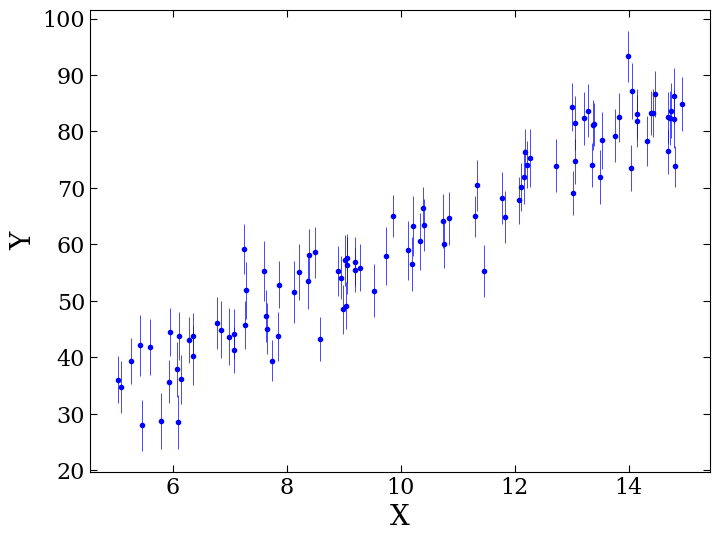

In [9]:
# <your turn>: output of this cell should be a plot

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.errorbar(x=data_x, y=data_y, yerr=data_dy,fmt='.b',elinewidth=0.5)

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

### b. Likelihood and frequentist point-estimation (6 points)

Define a linear model $f(X, m, d)$ so that:

$$ Y \sim mX+d $$

where $m$ and $d$ are scalar model parameters.

Construct a simple gaussian (log)-likelihood function, and use maximum likelihood estimation to estimate the best-fit values for $m$ and $d$.

In [10]:
# <your turn>: This cell should contain your definition for model, likelihood (and other functions you may need).
# Output of this cell should be printed best-fit values of m and d

def model(x, m, d):
  return x*m + d

def negloglikelihood(theta, x, y, dy):
  m, d = theta
  return 0.5*np.sum(((y-model(x,m,d))/dy)**2)

param_guess = np.array([1,1])

theta = minimize(negloglikelihood, x0=param_guess, args=(data_x, data_y, data_dy)).x
print(theta)

freq_best_fit_m = theta[0]
freq_best_fit_d = theta[1]

print(f'Best-fit m: {freq_best_fit_m}\nBest-fit d: {freq_best_fit_d}')

[5.12788781 8.57998756]
Best-fit m: 5.127887813473598
Best-fit d: 8.579987560061067


### c. Plot your best-fit model on top of your data (1 points)

You can simply re-use your code for part a and modify it.

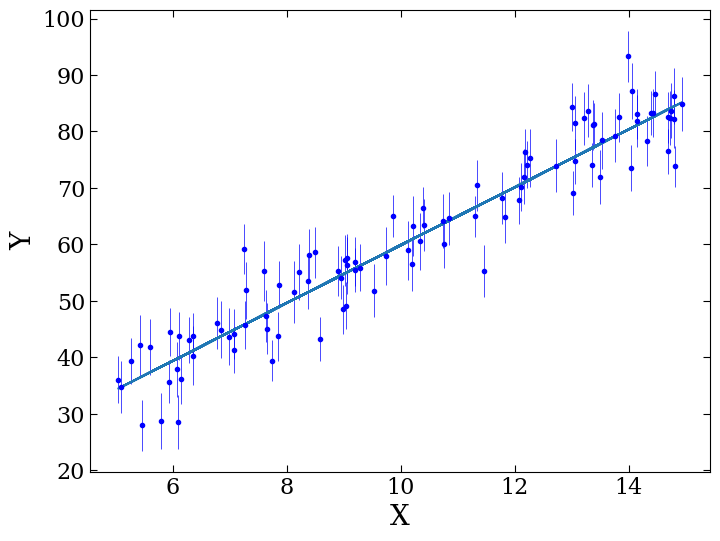

In [11]:
# <your turn>: output of this cell should be a plot

model_y = freq_best_fit_m * data_x + freq_best_fit_d

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.errorbar(x=data_x, y=data_y, yerr=data_dy,fmt='.b',elinewidth=0.5)
ax.plot(data_x, model_y)

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

### d. $\chi^2$ statistic (2 points)

Define a function to calculate the $\chi^2$ for any choice of $m$ and $d$. Then calculate $\chi^2$ for your best-fit model.

In [12]:
# <your turn>: output of this cell should be printed values for best-fit's chi2
def chi2(theta, x, y, dy):
  m, d = theta
  return sum(((y - model(x,m,d))/dy)**2)

print("chi2 = ", chi2(theta, data_x, data_y, data_dy))


chi2 =  123.79298629880714


### e. Fisher information (6 points)

Estimate the uncertainty on each parameter using variance as estimated from the information matrix.

In [13]:
# <your turn>: output of this cell should be printed values for uncertainties in m and d
# This cell can include new functions and variables you may need to define

# Because the Hessian uses partial derivatives, I will assume that the uncertainties for m and d are independent.
# Define neg log likelihood functions given a constant d value, and a constant m value.

def negloglikelihood_constd(m, d, x, y, dy):
  return 0.5*np.sum(((y-model(x,m,d))/dy)**2)

def negloglikelihood_constm(d, m, x, y, dy):
  return 0.5*np.sum(((y-model(x,m,d))/dy)**2)

var_m = np.sqrt(1./derivative(negloglikelihood_constd, theta[0], n=2, args=[theta[1], data_x, data_y, data_dy]))
print("m = ", theta[0], "+/-", var_m)

var_d = np.sqrt(1./derivative(negloglikelihood_constm, theta[1], n=2, args=[theta[0], data_x, data_y, data_dy]))
print("d = ", theta[1], "+/-", var_d, "\n")


m =  5.127887813473598 +/- 0.04131040852007378
d =  8.579987560061067 +/- 0.4427110087023876 



<ipython-input-13-1ddb99ec4862>:13: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  var_m = np.sqrt(1./derivative(negloglikelihood_constd, theta[0], n=2, args=[theta[1], data_x, data_y, data_dy]))
<ipython-input-13-1ddb99ec4862>:16: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  var_d = np.sqrt(1./derivative(negloglikelihood_constm, theta[1], n=2, args=[theta[0], data_x, data_y, data_dy]))


### f. $\Delta$-statistic uncertainties (5 points)

Estimate the 1-$\sigma$ uncertainty on model parameters using the $\Delta$-statistic method.

- **Note 1**: This is an estimate, answers withing 10% of 1-$\sigma$ are acceptable.
- **Note 2**: Remember these uncertainties are not necessarily symmetric like the Fisher estimates. Thus you need to estimate the lower and upper uncertainties on each parameter separately.

- **Hint**: Comparing with the Tutorial, you can already see that just one more dimension in the parameter space requires changes in our approach. One simple (yet relatively computationally inefficient) way to approach the problem is a "grid-search". I.e., over a 2-D grid of values for $m$ and $d$, search for points on the grid where the condition (for being $\approx$1-$\sigma$) is satisfied. The smallest and largest values of $m$ and $d$ which satistfy the condition are your error bounds (based on which you can calculate uncertainties). Your grid doesn't need to be very large, and the range and grid resolution for each of $m$ and $d$ can be guessed from your calculations for the previous cells above. Note that this method is only one way to estimate the uncertainties. You are free to explore/use other methods.

In [14]:
# <your turn>: output of this cell should be printed values for uncertainties in m and d
# This cell can include new functions and variables you may need to define

"""
Note regarding the grid search method:
If you decide to use the grid-search method mentioned above, try to optimize your search
based on what you know about the parameter space. For example, your search doesn't need
to wander very far from the best-fit values. Given requested precision, your search should
not require more than a total of 1e6 points (1000 per axis).
"""

def delta_1sig(theta, x, y, dy):
  return chi2(theta, x, y, dy) - chi2([freq_best_fit_m, freq_best_fit_d], x, y, dy) - 1

# m shouldn't be <= 0

# create a grid of m and d
# m should be centered on 5 with steps of 0.05: range 4 to 6, 40 steps total
# d should be centered on 9 with steps of 0.5: 7 to 11, 8 steps total
# create a loop that calls fsolve for each value
# keep track of the lowest and highest values

m_grid = np.linspace(4, 6, 500) # adding extra steps as 40 and 8 steps weren't enough. Also expanded the range for d as the lower bound was close to 7 -> wanted to see if it extended further
d_grid = np.linspace(5, 11, 500)

lower_m = freq_best_fit_m
upper_m = freq_best_fit_m
lower_d = freq_best_fit_d
upper_d = freq_best_fit_d

for m in m_grid:
  for d in d_grid:
    curr_theta = [m, d]
    temp = delta_1sig(curr_theta, data_x, data_y, data_dy)
    if ( temp < 0.01 and temp > -0.01 ): # if close to zero
      if ( m < lower_m ):
        lower_m = m
      elif ( m > upper_m ):
        upper_m = m
      if( d < lower_d ):
        lower_d = d
      elif( d > upper_d ):
        upper_d = d

print("Lower m = ", lower_m)
print("Upper m = ", upper_m)

print("Lower d = ", lower_d)
print("Upper d = ", upper_d, "\n")

m_lower_uncert = freq_best_fit_m - lower_m
m_upper_uncert = upper_m - freq_best_fit_m

d_lower_uncert = freq_best_fit_d - lower_d
d_upper_uncert = upper_d - freq_best_fit_d

print("m = ", freq_best_fit_m, "(-", m_lower_uncert, " +", m_upper_uncert, ")")
print("d = ", freq_best_fit_d, "(-", d_lower_uncert, " +", d_upper_uncert, ")")

Lower m =  4.985971943887775
Upper m =  5.270541082164328
Lower d =  7.032064128256513
Upper d =  10.13426853707415 

m =  5.127887813473598 (- 0.14191586958582292  + 0.14265326869073025 )
d =  8.579987560061067 (- 1.5479234318045538  + 1.5542809770130823 )


### g. Bootstrap/Monte-Carlo (4 points)

Estimate the 1-$\sigma$ uncertainty on model parameters using bootstrap simulations. Assume each $y_i$ and $\sigma_i$ represent a gaussian distribution for measurement uncertainty. $\sigma_i$ and $x_i$ are set by the observation. Thus you are only bootstrapping the $y_i$ measurements (not $x_i$ or $\sigma$). You don't need more than 5000 simulations.

hint: you can use the 15.9% and 84.1% quantiles as the boundaries of the central ~68% (i.e., equivalent of 1-$\sigma$ for a normally-distributed variate).

In [15]:
# <your turn>: output of this cell should be printed values for uncertainties in m and d
# This cell can include new functions and variables you may need to define
n_bootstrap = 5000
m_bootstrap = []
d_bootstrap = []

for i in range(n_bootstrap):
  bootstrap_data = st.norm.rvs(data_y, data_dy)
  iteration_best_fit = minimize(negloglikelihood,[1,1],args=(data_x, bootstrap_data, data_dy)).x
  m_bootstrap.append(iteration_best_fit[0])
  d_bootstrap.append(iteration_best_fit[1])

m_lower_bound = np.quantile(m_bootstrap,.159)
m_upper_bound = np.quantile(m_bootstrap,.841)
print("m lower bound = ", m_lower_bound, "m upper bound = ", m_upper_bound)

d_lower_bound = np.quantile(d_bootstrap,.159)
d_upper_bound = np.quantile(d_bootstrap,.841)
print("d lower bound = ", d_lower_bound, "d upper bound = ", d_upper_bound, "\n")

m_lower_uncert = freq_best_fit_m - m_lower_bound
m_upper_uncert = m_upper_bound - freq_best_fit_m

d_lower_uncert = freq_best_fit_d - d_lower_bound
d_upper_uncert = d_upper_bound - freq_best_fit_d

print("m = ", freq_best_fit_m, "(-", m_lower_uncert, " +", m_upper_uncert, ")")
print("d = ", freq_best_fit_d, "(-", d_lower_uncert, " +", d_upper_uncert, ")")

m lower bound =  4.984741990653974 m upper bound =  5.273528790158334
d lower bound =  7.057800561495296 d upper bound =  10.121620651082372 

m =  5.127887813473598 (- 0.1431458228196245  + 0.14564097668473597 )
d =  8.579987560061067 (- 1.522186998565771  + 1.5416330910213052 )


### h. Histograms for the bootstrap samples (1 point)

Plot histograms for the bootstrap samples of $m$ and $d$.

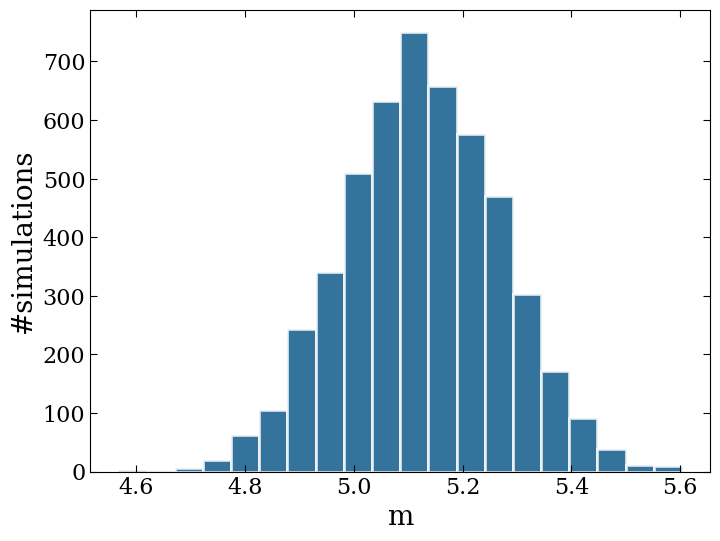

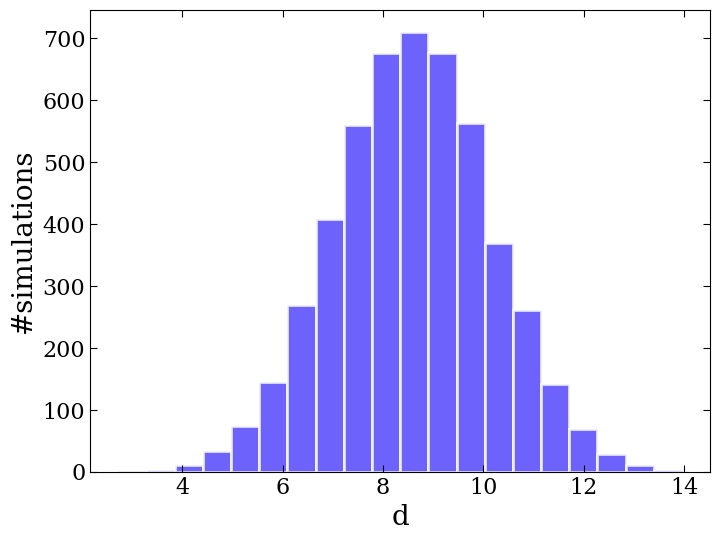

In [16]:
# <your turn>: output of this cell should be two plots

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(m_bootstrap, bins=20, edgecolor='w',lw=2, alpha=0.8, color=colorset[3])

ax.set_xlabel('m',fontsize=20)
ax.set_ylabel('#simulations',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(d_bootstrap, bins=20, edgecolor='w',lw=2, alpha=0.8, color=colorset[5])

ax.set_xlabel('d',fontsize=20)
ax.set_ylabel('#simulations',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)
plt.show()

### i. Bayesian inference (5 points)

Define **normalized** log-prior PDFs for $m$ and $d$ such that:
$$ m \sim \mathcal{N}(1,2)$$
$$ d \sim \mathcal{U}(-1,20)$$

And define your log-posterior such that:
$$ P(m,d|X,Y,\sigma) \propto P(m) P(d) P(X,Y,\sigma|m,d) $$

For the posterior, note that:
- You can ignore model evidence.
- You can use the same likelihood function you defined in part b.

In [17]:
# <your turn>: This cell will not have any outputs, just your definitions for the log-PDFs.

def log_prior_m(m):
    mean = 1
    std_dev = 2
    return st.norm.logpdf(freq_best_fit_m, loc=mean, scale=std_dev)


def log_prior_d(d):
    lolim = -1
    uplim = 20
    return st.uniform( lolim, uplim-lolim ).logpdf(freq_best_fit_d)


def log_posterior(theta, x, y, dy):
    m, d = theta
    return log_prior_m(m) + log_prior_d(d) - negloglikelihood(theta, x, y, dy)



#### MCMC sampling
If your definitions above are computationally valid, the following cell will successfully run an MCMC sampling for the posterior PDF and produce posterior samples for m and d, stored in new variables called `m_posterior_samp` and `d_posterior_samp`. It will also store the chains in a variable called `chains`.

This might take a few minutes to run and might print out warnings.

In [18]:
# This cell does not require any modification, just exectue it.
chains, m_posterior_samp, d_posterior_samp = mcmc_runner(log_posterior, data_x, data_y, data_dy)

### j. Assessing chain convergence (2 point)

The cell below will produce plots of parameter values per step for all the walkers in our MCMC.

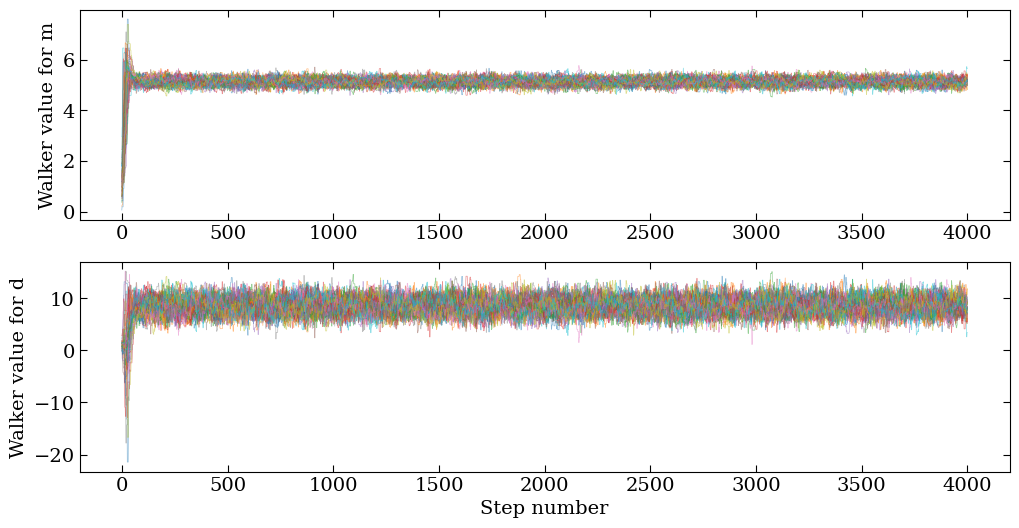

In [19]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
for chain_no in range(50):
    ax1.plot(chains[chain_no,:,0],'-',lw=0.5,alpha=0.5)
    ax2.plot(chains[chain_no,:,1],'-',lw=0.5,alpha=0.5)
ax2.set_xlabel('Step number',fontsize=14)
ax1.set_ylabel('Walker value for m',fontsize=14)
ax2.set_ylabel('Walker value for d',fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', length=5)
ax1.tick_params(axis='both', which='minor', length=2.5)
ax1.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', length=5)
ax2.tick_params(axis='both', which='minor', length=2.5)
ax2.tick_params(axis='both', which='both',direction='in',right=True,top=True)

Our MCMC has 50 walkers, each taking 4000 steps and we dismiss the first 1000 steps as burn-in. Comment on whether the chains appear to have converged from these plots and whether 1000 steps appears to be sufficient for burn-in.

Double click the markdown box below to write .

$\color{red}{<your~turn>}$: The chains appear to have converged, as close to 4000 steps they are remaining around the same values each time, those being m≈5 and d≈7-11. 1000 steps appears to be sufficient burn-in, as this would eliminate the large variations seen at the start of the chains. From these graphs, it looks like a burn in of 200 would also be sufficient, without getting rid of additional data.

### j.  Bayesian point and interval estimation (2 points)

Using the posterior samples created in the cell above, perform point and interval estimation. Any appropriate point estimation is acceptable. For interval estimation, estimate the 1-$\sigma$ uncertainties.

#### Point estimation

In [22]:
# <your turn>: Output of this cell should be printed best-fit values of m and d

def neg_log_posterior(theta, x, y, dy):
  m, d = theta
  return -1 * log_posterior(theta, x, y, dy)

results_bayesian = minimize(neg_log_posterior, [1,1], args=(data_x, data_y, data_dy)).x
bayesian_m = results_bayesian[0]
bayesian_d = results_bayesian[1]

print("m = ", bayesian_m, "d = ", bayesian_d)

m =  5.127887727716275 d =  8.579988688758188


#### Interval estimation

In [23]:
# <your turn>: output of this cell should be printed values for uncertainties in m and d

m_lower_bound = np.quantile(m_posterior_samp,.159)
m_upper_bound = np.quantile(m_posterior_samp,.841)
print("m lower bound = ", m_lower_bound, "m upper bound = ", m_upper_bound)

d_lower_bound = np.quantile(d_posterior_samp,.159)
d_upper_bound = np.quantile(d_posterior_samp,.841)
print("d lower bound = ", d_lower_bound, "d upper bound = ", d_upper_bound, "\n")

m_lower_uncert = bayesian_m - m_lower_bound
m_upper_uncert = m_upper_bound - bayesian_m

d_lower_uncert = bayesian_d - d_lower_bound
d_upper_uncert = d_upper_bound - bayesian_d

print("m = ", bayesian_m, "(-", m_lower_uncert, " +", m_upper_uncert, ")")
print("d = ", bayesian_d, "(-", d_lower_uncert, " +", d_upper_uncert, ")")

m lower bound =  4.989280817989328 m upper bound =  5.273542741436873
d lower bound =  7.029689548903024 d upper bound =  10.08830795567767 

m =  5.127887727716275 (- 0.13860690972694734  + 0.14565501372059764 )
d =  8.579988688758188 (- 1.5502991398551647  + 1.5083192669194823 )


### k. "Corner" plots for linked posterior samples (1 point)

Pass your posterior samples for $m$ and $d$ along with the bayesian best-fit values for those parameters to the function below to see a visualization of your results.

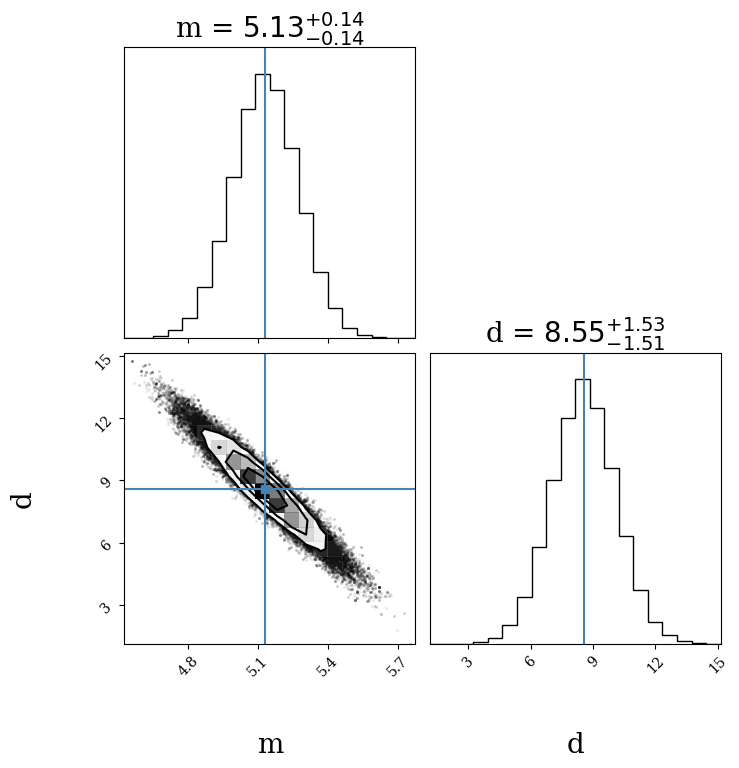

In [24]:
# <your turn>: This cell will automatically return a plot, you simply need to fill in function arguments
# replace a,b,c,d as following:
# a should be your posterior sample for m
# b should be your posterior sample for d
# c should be your bayesian best-fit value for m
# d should be your bayesian best-fit value for d

cornerplot(m_posterior_samp,d_posterior_samp,bayesian_m,bayesian_d);

### l. Compare the uncertainty (interval) estimation results from parts e, f, g, j and comment on potential reasons behind any significant (i.e., a factor of a few) discrepancies (3 points).

Double click the markdown box below to write your answer there and explain your reasoning.

$\color{red}{<your~turn>}$: Overall, the uncertainties from the Delta statistics, Bootstrap/Monte Carlo, and Bayesian from MCMC are all very similar, with the uncertainty for m usually +- 0.1, while the uncertainty for d is usually +- 2. These uncertainties are estimates of the 1- σ statistic.

Only the Fisher information differs, with the uncertainty for m +- 0.04, while the uncertainty for d is +- 0.4. This uncertainty was calculated from the variance of the inverse of the Hessian of the log-likelihood. This was used to calculate the standard deviation, σ.

The differences in magnitude are likely due to the fact that the uncertainties drawn from the Delta statistics, Bootstrap/Monte Carlo, and Bayesian/MCMC methods are calculating 1- σ, while the Fisher information is calculating σ. These are different confidence intervals, hence leading to different uncertainties.

**End of questions**

Make sure that you:

- [x] Typed in your name in the first cell of the Notebook.
- [x] Saved the Notebook after your modifications.
- [x] Cleaned the Notebook: if you have added cells/work to test items that are not requested, remove them.
- [x] Tested the Notebook and that the notebook can be executed in a single sequential run. E.g., by clicking the <kbd>Restart & Run All</kbd> under the <kbd>Kernel</kbd> menu.
- [x] Make sure that every cell that should have an output, has an output displayed.
- [x] If you're using Binder, save and download the completed Notebook.
- [x] Upload the finished notebook to Blackboard (as Jupyter Notebook or PDF)

**End of assignmnet**